**1. Load the data**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from tools.datasets import get_prudential

data, labels, continuous, discrete, dummy, categorical, _ = get_prudential()

In [3]:
# check target values
labels.unique()

array([8, 4, 1, 6, 2, 7, 3, 5])

In [4]:
# look at some properties of the target variable
labels.describe()

count    59381.000000
mean         5.636837
std          2.456833
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Response, dtype: float64

Check the distribution of the target variable.

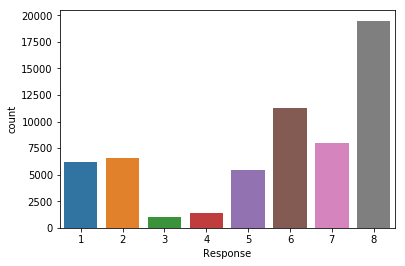

In [5]:
sns.countplot(labels)

From the description (link to source), we know that the target is an ordinal variable from 1 to 8 and the evaluation metric is quadratic weighed kappa. Even though the ordering 

In [6]:
# check for missing values
data[categorical].isnull().sum()

Medical_History_27     0
Medical_History_4      0
Medical_History_28     0
Product_Info_5         0
Product_Info_2         0
Product_Info_7         0
Medical_History_31     0
Medical_History_34     0
Medical_History_38     0
Medical_History_26     0
Medical_History_13     0
InsuredInfo_3          0
Medical_History_6      0
Medical_History_37     0
InsuredInfo_4          0
Insurance_History_2    0
Medical_History_22     0
Medical_History_41     0
Insurance_History_4    0
Medical_History_2      0
Medical_History_7      0
Medical_History_19     0
Medical_History_30     0
Employment_Info_2      0
Medical_History_33     0
Insurance_History_7    0
Medical_History_21     0
Medical_History_16     0
Medical_History_9      0
Medical_History_40     0
Product_Info_1         0
Medical_History_12     0
Medical_History_8      0
Product_Info_3         0
InsuredInfo_5          0
Medical_History_14     0
InsuredInfo_2          0
InsuredInfo_7          0
Medical_History_3      0
Employment_Info_3      0


In [2]:
from statistics.cramer import categorical_relation_with

top = categorical_relation_with(data, 'Response', categorical + dummy)
top_categorical = top[0].sort_values(ascending=False).index[0:10]
top[1].sort_values(ascending=False)[0:10] # print 

Medical_Keyword_45    0.194523
Medical_Keyword_32    0.064642
Medical_Keyword_20    0.044796
Medical_Keyword_2     0.012932
Medical_Keyword_6     0.001852
Product_Info_7        0.001670
Medical_Keyword_39    0.000605
Medical_Keyword_44    0.000105
Medical_Keyword_26    0.000061
Medical_Keyword_5     0.000038
dtype: float64

Medical Keyword 32 and 45 seem to be unrelated (

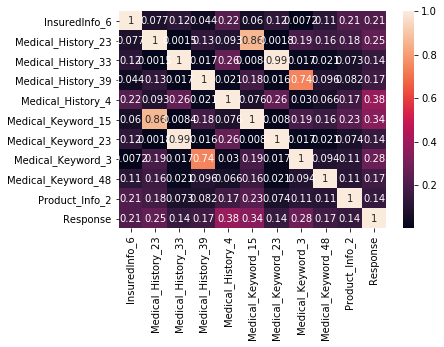

In [7]:
from statistics.cramer import cross_categorical

v, p = cross_categorical(data, sorted(list(top_categorical)) + ['Response'])
sns.heatmap(v, annot=True)

Medical history 33 is strongly correlated with medical keyword 23, maybe the keyword is always present for the patients with something specific in their medical history. We can drop the keyword too. We can see that medical history 4 and keywords 15 and 3 have a significant correlation with Response.

**3. Discrete **

In [7]:
data[discrete].isnull().sum()

Medical_History_1      8889
Medical_History_10    58824
Medical_History_15    44596
Medical_History_24    55580
Medical_History_32    58274
dtype: int64

In [12]:
data[discrete].describe()

,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
count,50492.000000,557.000000,14785.000000,3801.000000,1107.000000
mean,7.962172,141.118492,123.760974,50.635622,11.965673
std,13.027697,107.759559,98.516206,78.149069,38.718774
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.000000,17.000000,1.000000,0.000000
50%,4.000000,229.000000,117.000000,8.000000,0.000000
75%,9.000000,240.000000,240.000000,64.000000,2.000000
max,240.000000,240.000000,240.000000,240.000000,240.000000


Quite a lot comparing to the set size (59k), except medical history 1, most of the values are missing or not present. Maybe they refer to some specific illness or test that not everyone needed to pass. Before doing anything about them, let's check the distibutions

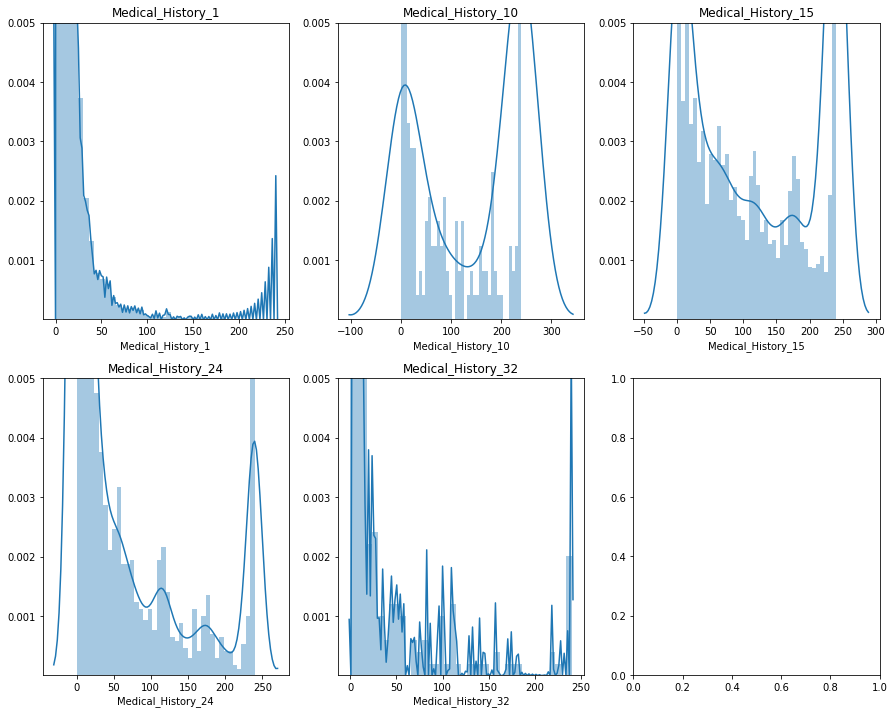

In [5]:
i = 0
fig, axes = plt.subplots(int(math.ceil(len(discrete)/3)), 3, figsize=(15,12))
for attr in discrete:
    clean = data[attr].dropna()
    sns.distplot(clean, bins=40, ax=axes[int(i/3)][i%3]).set_title(attr)
    axes[int(i/3)][i%3].set_ylim(0.00001,0.005)
    i += 1

Two significant peaks at the edges, maybe the values were clipped to 240. let's check if these are 240 and 0 that take most of these samples or is it distributed.

In [4]:
for attr in discrete:
    print("{}, nan: {}".format(attr, data[attr].isnull().sum()))
    print(dict(data[attr].value_counts().nlargest(20)))

Medical_History_1, nan: 8889
{1.0: 7657, 2.0: 5727, 0.0: 4789, 3.0: 4722, 4.0: 3668, 5.0: 3149, 6.0: 3017, 7.0: 2082, 12.0: 1738, 8.0: 1618, 9.0: 1480, 10.0: 1339, 11.0: 1183, 13.0: 863, 14.0: 715, 15.0: 583, 16.0: 499, 18.0: 452, 17.0: 442, 24.0: 355}
Medical_History_10, nan: 58824
{240.0: 270, 0.0: 75, 1.0: 22, 2.0: 13, 5.0: 10, 8.0: 6, 4.0: 5, 3.0: 5, 111.0: 4, 19.0: 4, 6.0: 4, 13.0: 4, 120.0: 4, 27.0: 3, 183.0: 3, 24.0: 3, 16.0: 3, 10.0: 3, 75.0: 3, 59.0: 3}
Medical_History_15, nan: 44596
{240.0: 4566, 0.0: 2135, 1.0: 237, 2.0: 132, 12.0: 132, 14.0: 122, 15.0: 110, 13.0: 110, 3.0: 109, 16.0: 87, 24.0: 78, 18.0: 76, 6.0: 75, 4.0: 74, 17.0: 72, 60.0: 69, 26.0: 63, 8.0: 62, 28.0: 58, 5.0: 58}
Medical_History_24, nan: 55580
{0.0: 769, 1.0: 408, 240.0: 338, 2.0: 193, 3.0: 163, 4.0: 94, 6.0: 93, 5.0: 88, 12.0: 85, 8.0: 68, 7.0: 59, 9.0: 44, 10.0: 37, 13.0: 33, 11.0: 30, 17.0: 28, 24.0: 26, 16.0: 26, 15.0: 26, 19.0: 25}
Medical_History_32, nan: 58274
{0.0: 744, 1.0: 73, 2.0: 35, 3.0: 23, 

In [3]:
from config import BINNER_CONFIG
from transformers.custom_binner import CustomBinner
binner = CustomBinner(BINNER_CONFIG)

data = binner.transform(data)
new_cols = list(set(data.columns) - set(discrete + categorical + dummy + continuous + ['Id', 'Response']))
# check new columns for correlations

top = categorical_relation_with(data, 'Response', new_cols)
top_categorical = top[0].sort_values(ascending=False).index[0:10]
top[0].sort_values()

Medical_History_1_r200_241       0.010399
Medical_History_32_v240          0.010827
Medical_History_1_r100_200       0.015694
Medical_History_24_v240          0.034018
Medical_History_10_v240          0.034175
Medical_History_10_v0            0.036562
Medical_History_10_r1e-09_240    0.042643
Medical_History_1_r30_100        0.051568
Medical_History_10_nan           0.058500
Medical_History_32_r1e-09_240    0.068212
Medical_History_24_r1e-09_240    0.071974
Medical_History_1_v0             0.080868
Medical_History_1_nan            0.083643
Medical_History_15_v240          0.090100
Medical_History_24_v0            0.100897
Medical_History_1_r10_30         0.103100
Medical_History_1_r1e-09_10      0.107218
Medical_History_24_nan           0.108316
Medical_History_32_v0            0.124943
Medical_History_32_nan           0.138972
Medical_History_15_r1e-09_240    0.173826
Medical_History_15_nan           0.358808
Medical_History_15_v0            0.617422
dtype: float64

Medical history 15 might be usefull. Three lowest are not relevant (to delete).

In [23]:
from statistics.cat_to_num import apply_across

# apply_across(data, new_cols, ['Response'], stats.spearmanr)
# experimentally it seams that filling missing
pd.Series([stats.spearmanr( data['Response'], data[col].fillna(300))[0] for col in discrete], index=discrete).sort_values()

Medical_History_10    0.046395
Medical_History_24    0.076933
Medical_History_32    0.083188
Medical_History_1     0.148349
Medical_History_15    0.254565
dtype: float64

Binning seems to work, but filling missing values makes sense too. Let's check it later on the model.

In [87]:
print(apply_across(data[['Response'] + discrete].fillna(-1), ['Response'], discrete, stats.kruskal))

[[[4.82803590e+002 3.98391253e-100]]

 [[2.02490678e+002 3.40657990e-040]]

 [[4.78029043e+003 0.00000000e+000]]

 [[6.63978343e+002 4.01274198e-139]]

 [[1.14274799e+003 1.69064795e-242]]]


All seem to have some influence. p < 0.05

**4. Continuous **

In [90]:
print(data[continuous].describe())

       Product_Info_4       Ins_Age            Ht            Wt           BMI  \
count    59381.000000  59381.000000  59381.000000  59381.000000  59381.000000   
mean         0.328952      0.405567      0.707283      0.292587      0.469462   
std          0.282562      0.197190      0.074239      0.089037      0.122213   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.076923      0.238806      0.654545      0.225941      0.385517   
50%          0.230769      0.402985      0.709091      0.288703      0.451349   
75%          0.487179      0.567164      0.763636      0.345188      0.532858   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

       Employment_Info_1  Employment_Info_4  Employment_Info_6  \
count       59362.000000       52602.000000       48527.000000   
mean            0.077582           0.006283           0.361469   
std             0.082347           0.032816           0.349551   
min   

There are some missing values amond the variables, handle later. All seem to be normalized to range 0-1.

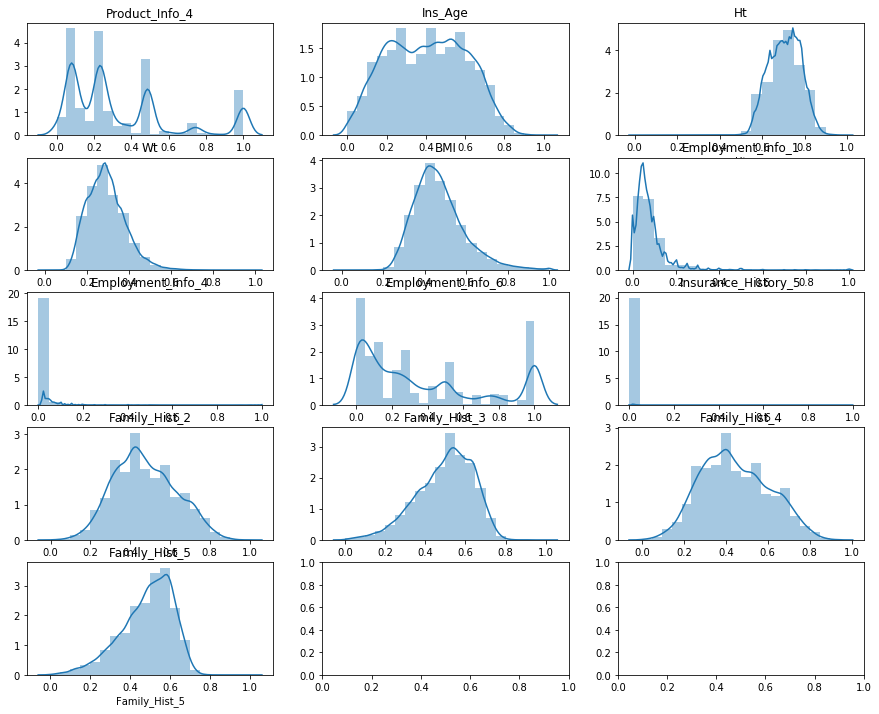

In [7]:
i = 0
fig, axes = plt.subplots(int(math.ceil(len(continuous)/3)), 3, figsize=(15,12))
# plt.figure()
for attr in continuous:
    clean = data[attr].dropna()
    sns.distplot(clean, bins=20, ax=axes[int(i/3)][i%3]).set_title(attr)
    i += 1

In [2]:
# for now just use the simplest approach, and add na flags
from transformers.fill_missing_transformer import FillNaTransformer

fill_with_zero = ['Employment_Info_4', 'Insurance_History_5']
fill_with_median = [ x for x in continuous if x not in fill_with_zero]

filler = FillNaTransformer(median=fill_with_median, zero=fill_with_zero, nan_flag=continuous)
filler.fit(data)
data = filler.transform(data)


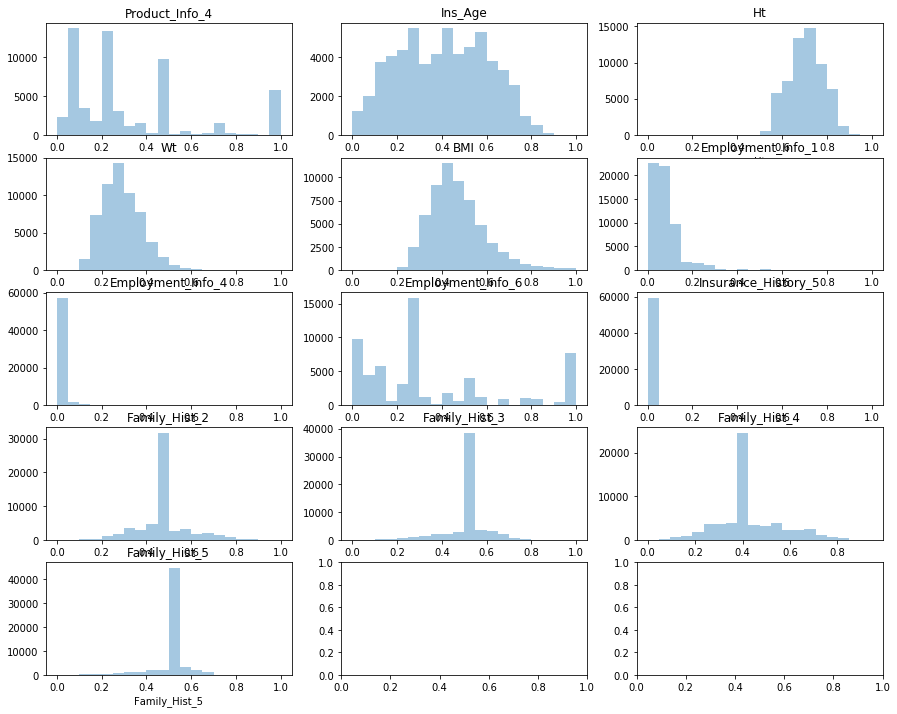

In [7]:
# plot to check result
i = 0
fig, axes = plt.subplots(int(math.ceil(len(continuous)/3)), 3, figsize=(15,12))
# plt.figure()
for attr in continuous:
    clean = data[attr].dropna()
    sns.distplot(clean, bins=20, ax=axes[int(i/3)][i%3], kde=None).set_title(attr)
    i += 1

Doesn't look that good, but let's leave it like that for now. Most of the variables are more or less normally distributed. Some of the features are evidently skewed, let's check it and fix.

In [8]:

data[continuous].apply(lambda x: stats.skew(x))


Product_Info_4           1.221242
Ins_Age                  0.021995
Ht                      -0.086709
Wt                       0.694013
BMI                      0.944237
Employment_Info_1        4.709284
Employment_Info_4       16.412588
Employment_Info_6        1.030755
Insurance_History_5    131.313451
Family_Hist_2            0.433363
Family_Hist_3           -1.262035
Family_Hist_4            0.409101
Family_Hist_5           -1.997762
dtype: float64

In [7]:
from transformers.box_cox import BoxCoxTransformer
# tune those,
lambdas_per_column = {
    'Product_Info_4': 0.5,
    'Ht': 1.2,
    'Wt': 0.5,
    'BMI': 0.6,
    'Employment_Info_1': 0.5,
    'Employment_Info_4': 0.5,
    'Employment_Info_6': 0.5,
    'Insurance_History_5': 0.5,
    'Family_Hist_2': 0.7,
    'Family_Hist_3': 2,
    'Family_Hist_4': 0.7,
    'Family_Hist_5': 2
}
boxcox = BoxCoxTransformer(lambdas_per_column)
data = boxcox.transform(data)


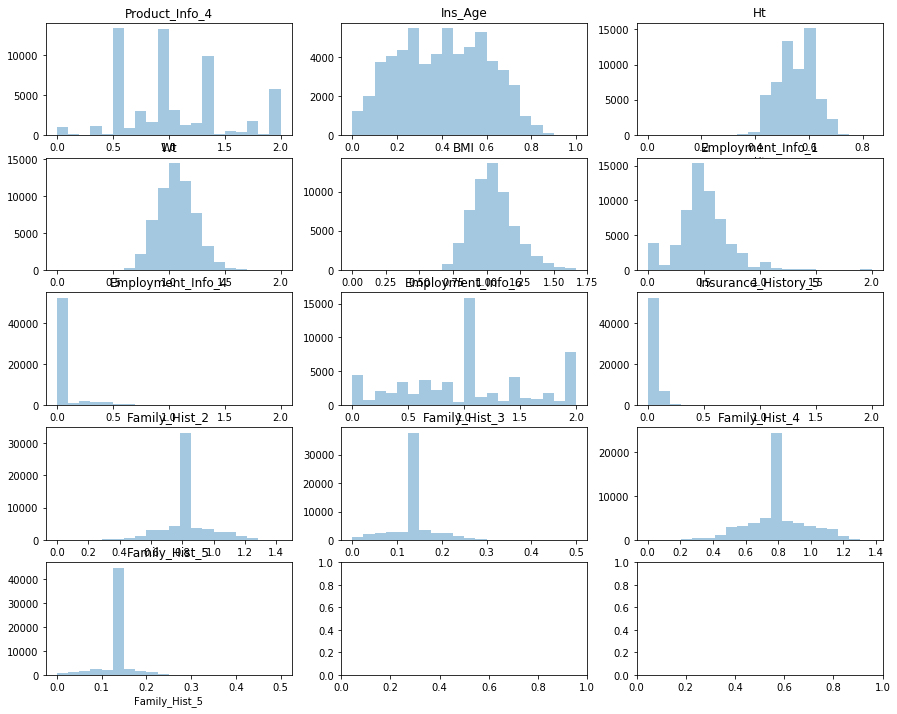

In [14]:
i = 0
fig, axes = plt.subplots(int(math.ceil(len(continuous)/3)), 3, figsize=(15,12))
# plt.figure()
for attr in continuous:
    clean = data[attr].dropna()
    sns.distplot(clean, bins=20, ax=axes[int(i/3)][i%3], kde=None).set_title(attr)
    i += 1

In [8]:

data[continuous].apply(lambda x: stats.skew(x))

Product_Info_4         0.448936
Ins_Age                0.021995
Ht                    -0.031668
Wt                     0.221317
BMI                    0.600449
Employment_Info_1      0.886720
Employment_Info_4      4.512832
Employment_Info_6      0.137774
Insurance_History_5    3.264121
Family_Hist_2         -0.016757
Family_Hist_3          0.156949
Family_Hist_4          0.016350
Family_Hist_5         -0.337336
dtype: float64

Looks much better, still not perfect, but quite ok.

In [10]:
# from statistics.cat_to_num import spearman_with
# sns.heatmap(apply_across(data, ['Response'], continuous, stats.spearmanr))
from statistics.cat_to_num import spearman_with

correlation = spearman_with(data, 'Response', continuous)
correlation = pd.Series({col: res for col, res in correlation.items()})

In [35]:
correlation.sort_values()

BMI                   -0.427122
Wt                    -0.397311
Ins_Age               -0.218214
Ht                    -0.120839
Family_Hist_4         -0.074526
Family_Hist_2         -0.046877
Employment_Info_4     -0.037273
Family_Hist_3          0.004527
Family_Hist_5          0.004759
Employment_Info_6      0.020836
Insurance_History_5    0.044879
Employment_Info_1      0.058152
Product_Info_4         0.249167
dtype: float64

Most correlated are BMI, Wt, Ins_Age, Ht and Product_Info_4.

In [11]:
cols = [col for col, corr in correlation.items() if abs(corr) > 0.1]

In [8]:
cols

['BMI', 'Ht', 'Ins_Age', 'Product_Info_4', 'Wt']

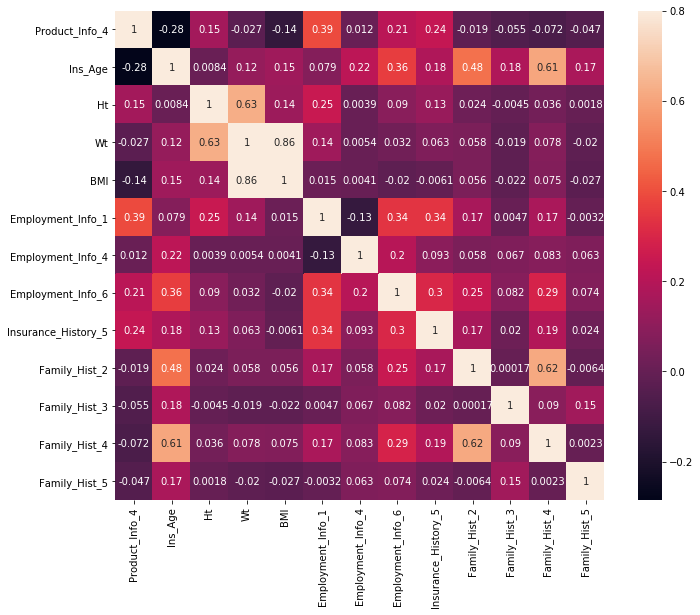

In [38]:

corrmat = data[continuous].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

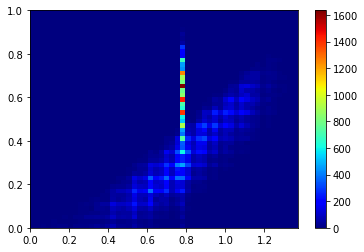

In [12]:
x = data['Family_Hist_4']
y = data['Ins_Age']
plt.hist2d(x, y, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

In [3]:
from statistics.cramer import categorical_relation_with
cont_nan = [col + '_nan' for col in continuous if col+'_nan' in  data.columns]
categorical_relation_with(data, 'Response', cont_nan)
# TODO: fix it!

(Employment_Info_1_nan      0.043515
 Employment_Info_4_nan      0.069838
 Employment_Info_6_nan      0.056493
 Insurance_History_5_nan    0.084133
 Family_Hist_2_nan          0.208749
 Family_Hist_3_nan          0.191042
 Family_Hist_4_nan          0.203707
 Family_Hist_5_nan          0.195429
 dtype: float64, Employment_Info_1_nan      2.861236e-21
 Employment_Info_4_nan      9.947851e-59
 Employment_Info_6_nan      1.902152e-37
 Insurance_History_5_nan    1.042242e-86
 Family_Hist_2_nan          0.000000e+00
 Family_Hist_3_nan          0.000000e+00
 Family_Hist_4_nan          0.000000e+00
 Family_Hist_5_nan          0.000000e+00
 dtype: float64)

['Employment_Info_4', 'Insurance_History_5']

In [ ]:
# TODO:
#  - tidy up the plots
#  - new features, polynomials, binning
#  - norm